<a href="https://colab.research.google.com/github/imugagga/Adults_Dataset/blob/main/Adults_Dataset_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset: Adult Data Set**

**Task**

*Prediction task is to determine whether a person makes over 50K in a year.*

#Part 1: About the Dateset
---

1) Source of data
```
https://archive.ics.uci.edu/ml/datasets/Adult
```

***2) Brief description of data***
```

This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
aimed to determined whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

```
***3) What is the target?***
```
Annual salary of the Individuals
Prediction task is to determine whether a person makes over 50K in a year.
```

*4) Is this a classification or regression problem?*
```
Classification Problem 
```
5) How many features?
```
There are 14 Features.
```
6) How many rows of data.
```
Rows: 32561
```
7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
```
Missing Values
```


In [92]:
#Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display='diagram')
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [94]:
#Read the file 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Machine Learning/Week 7/Uploads/adult.data',header=None)

df.columns=[ 'Age',	'Workclass',	'Final_Weight',	'Education','Education_Num',
            'Marital_Status',	'Occupation',	'Relationship',	'Race',	'Sex',	
            'Capital_Gain',	'Capital_Loss',	'Hours_Per_Week',	'Native_Country','Annual_Salary']
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Attribute Information:**

In [95]:
#Features
print(f'No. Features: {len(list(df.columns))-1}')

No. Features: 14


In [96]:
#Data Shape
df.shape

(32561, 15)

***Data Cleaning***

In [97]:
#Remove the whitespaces from the data.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [98]:
#Check for Duplicates
df.duplicated().sum()

24

In [99]:
#Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [100]:
#Checking for data Inconsistences
df.nunique()

Age                  73
Workclass             9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_Per_Week       94
Native_Country       42
Annual_Salary         2
dtype: int64

In [101]:
#Check Data types and Data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Final_Weight    32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_Num   32537 non-null  int64 
 5   Marital_Status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital_Gain    32537 non-null  int64 
 11  Capital_Loss    32537 non-null  int64 
 12  Hours_Per_Week  32537 non-null  int64 
 13  Native_Country  32537 non-null  object
 14  Annual_Salary   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [102]:
#View Column Contents
df['Workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [103]:
#In the dataset the missing values are represented as ' ?', 
#Thus i will replace this with a Nan to have a better view of the column with the missing values
df.replace('?',np.nan,inplace=True)

#Identify and addressed missing values
df.isnull().sum()

Age                  0
Workclass         1836
Final_Weight         0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     582
Annual_Salary        0
dtype: int64

In [104]:
#Filter Columns with Missing Values
dfm = df[df.isnull().sum()[df.isnull().sum() > 0].index]

#Compare Minning Values with the length of the dataframe column
print('Column       Missing Values   Full Column_Length')
for col in dfm:
  print(f'{col}:       {df[col].isnull().sum()}         {len(df)}')

Column       Missing Values   Full Column_Length
Workclass:       1836         32537
Occupation:       1843         32537
Native_Country:       582         32537


In [105]:
#Compare Missing Values with the length of the dataframe column
for col in dfm:
  print(f'{col}: Missing Values are {(df[col].isnull().sum()/len(df)*100).round(2)}% of the Column Length')

Workclass: Missing Values are 5.64% of the Column Length
Occupation: Missing Values are 5.66% of the Column Length
Native_Country: Missing Values are 1.79% of the Column Length


***Imputing Missing values.***

The Missing values are a small percentage of the data, as indicated above.
Since these are also object data type columns.

Each of these columns with missing values will be imputed with the most common element in the column.

In [106]:
#Imputation
Mode_Workclass  = df['Workclass'].mode()[0]
df['Workclass'].fillna(Mode_Workclass,inplace=True)

Mode_Occupation  = df['Occupation'].mode()[0]
df['Occupation'].fillna(Mode_Occupation,inplace=True)

Mode_Native_Country  = df['Native_Country'].mode()[0]
df['Native_Country'].fillna(Mode_Native_Country,inplace=True)

In [107]:
#Check for data Consistences

df1 = df.select_dtypes(include='object')
for col in df1:
  print(f'{col}: {df[col].unique()} \n')

#All the data is consistent and no incosistences identified

Workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

Marital_Status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

Occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

Relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

Race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

Sex: ['Male' 'Female'] 

Native_Country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England'

In [108]:
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Part 2: Exploratory Data Analysis
---

In [109]:
#Numerize the Target Column
salary_map = {'<=50K': 0, '>50K': 1}
df['Annual_Salary'] = df['Annual_Salary'].map(salary_map)

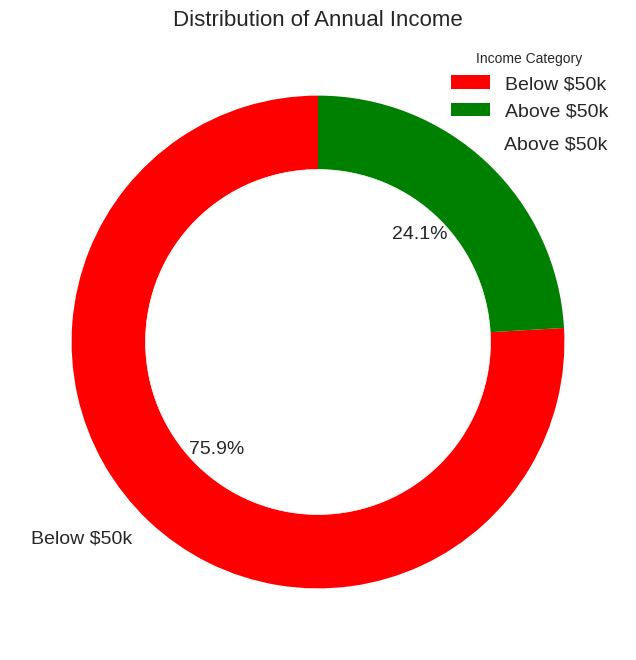

In [116]:
import matplotlib.pyplot as plt

# Set the ggplot style
plt.style.use('ggplot')

# Create a figure and axis object with specified size
fig, ax = plt.subplots(figsize=(8, 8))

# Define the labels and colors for the pie chart
labels = ['Below $50k', 'Above $50k']
colors = ['Red', 'Green']

# Create the pie chart using the value counts of the Annual_Salary column in the dataframe
ax.pie(df['Annual_Salary'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

# Set the title and fontsize for the chart
ax.set_title('Distribution of Annual Income', fontsize=16)

# Add a legend to the chart
ax.legend(title='Income Category', loc='best', fontsize=14)

# Add a circle at the center of the pie chart to make it look like a donut
circle = plt.Circle(xy=(0,0), radius=0.7, color='white')
ax.add_artist(circle)

# Set the aspect ratio to be equal so that the chart looks like a circle
ax.set(aspect="equal")

# Show the plot
plt.show()


*From the visualisation.*

The dataset is unbalanced as 75.9% of the data set are Below $50k  while only 24.1% are Above 50k Dollars



In [27]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

<Axes: >

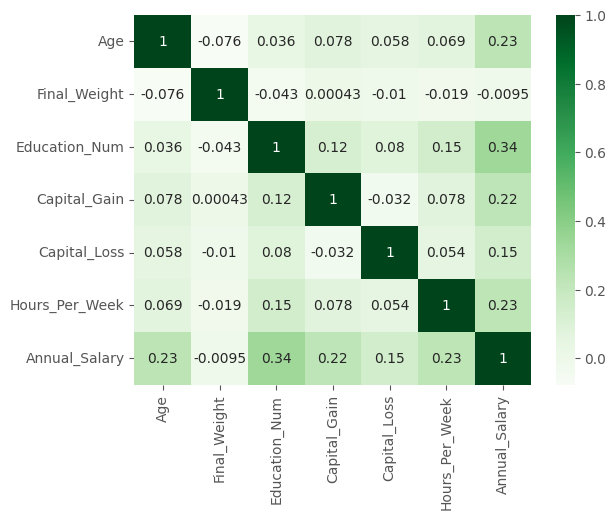

In [28]:
#View Correlations between the Various Features.
corr_df = df.corr()
Corr_matrix = sns.heatmap(corr_df,annot=True, cmap='Greens')
Corr_matrix

***Observation***

There are weak correlations of the numerical; columns to the target, however the age and and education Num havce slightly higher correlatiuons than the other columns.

In [29]:
#Visualise the Cleaned Dataframe
df['Count'] = 1
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary,Count
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [30]:
#Visualise Descriptive statisticsto identify any outliersin Numerical columns
df.describe().round(0)

#There are no Outliers in the dataset

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Annual_Salary,Count
count,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0
mean,39.0,189781.0,10.0,1078.0,87.0,40.0,0.0,1.0
std,14.0,105556.0,3.0,7388.0,403.0,12.0,0.0,0.0
min,17.0,12285.0,1.0,0.0,0.0,1.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0,0.0,1.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0,0.0,1.0
75%,48.0,236993.0,12.0,0.0,0.0,45.0,0.0,1.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0,1.0,1.0


In [31]:
#Export a copy of the  Cleaned Dataframe
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Machine Learning/Week 8/Assignments/Project 2/Adults_Dataset.csv', index=False)

#Part 3: Further EDA
---

**A Bar Chart to show the ration of Gender and the Annual Salary**

In [32]:
# Create the DataFrame
dfg = df.groupby(['Sex', 'Annual_Salary'])['Count'].sum().unstack()
dfg.reset_index(inplace=True)
dfg.columns=['Gender', 'Below_$50K', 'Above_$50K']

# Create percentages
dfg['Total_Count'] = dfg['Below_$50K'] + dfg['Above_$50K']
dfg['Below_$50K_Percentage'] = (dfg['Below_$50K'] / dfg['Total_Count']) * 100
dfg['Above_$50K_Percentage'] = (dfg['Above_$50K'] / dfg['Total_Count']) * 100
dfg['Total_Percentage'] = dfg['Total_Count'] / dfg['Total_Count'].sum() * 100
dfg.head()

,Gender,Below_$50K,Above_$50K,Total_Count,Below_$50K_Percentage,Above_$50K_Percentage,Total_Percentage
0,Female,9583,1179,10762,89.044787,10.955213,33.07619
1,Male,15115,6660,21775,69.414466,30.585534,66.92381


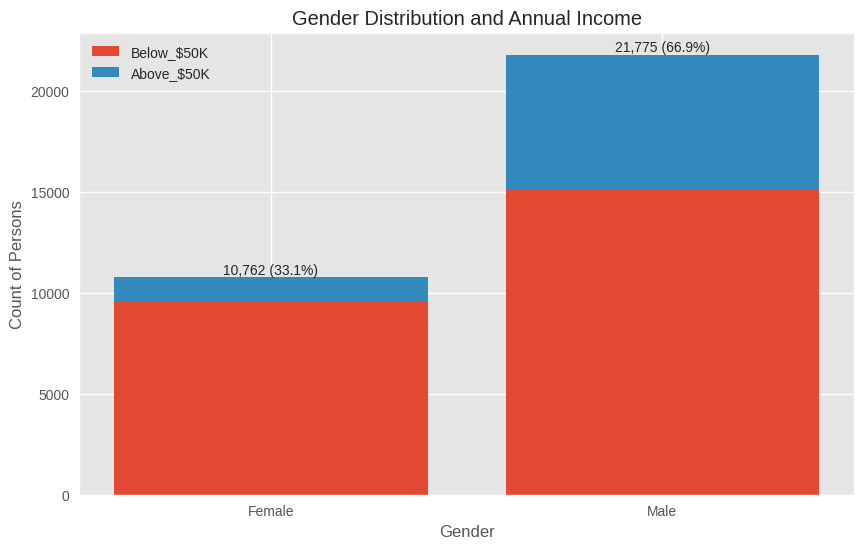

In [118]:
# Data
rows = dfg['Gender']
columns = ['Below_$50K', 'Above_$50K']
data = [dfg['Below_$50K'],dfg['Above_$50K']]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(rows, data[0], label=columns[0])
ax.bar(rows, data[1], bottom=data[0], label=columns[1])

# Add percentage annotations
totals = [i+j for i,j in zip(data[0], data[1])]
for i, total in enumerate(totals):
    percentage = f"{total:,} ({(total/sum(totals))*100:.1f}%)"
    ax.annotate(percentage, (rows[i], total), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Persons')
ax.set_title('Gender Distribution and Annual Income')
ax.legend()

plt.show()

**Observation**
```
From the stacked bar chart.
1. The data set comprises of more males (66.9%) than females(33.1%).
2. In Both the Genders, Only a very small percentage earns Above_$50K, while the biggest percentage earns Below_$50K per year
```

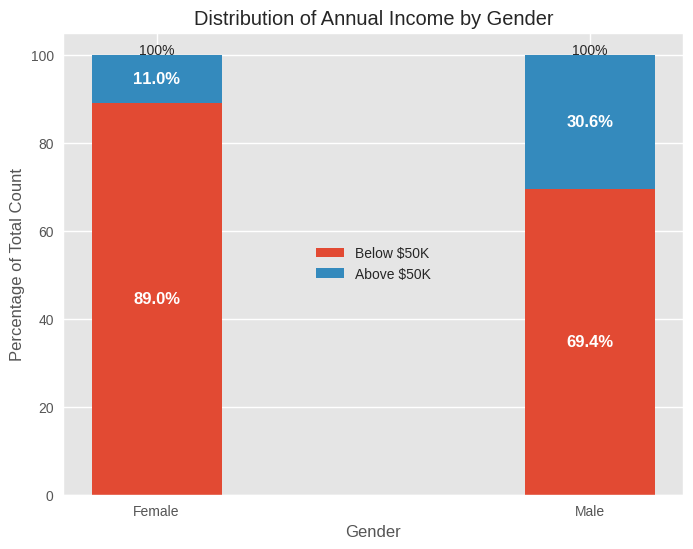

In [117]:
# Create stacked bar chart for the Percentage distributions of the Annual salary in the Gender

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(dfg['Gender'], dfg['Below_$50K_Percentage'], width=0.3, label='Below $50K')
ax.bar(dfg['Gender'], dfg['Above_$50K_Percentage'], bottom=dfg['Below_$50K_Percentage'], width=0.3, label='Above $50K')

# Add percentage annotations
for i, (row1, row2) in enumerate(zip(dfg['Below_$50K_Percentage'], dfg['Above_$50K_Percentage'])):
    total = row1 + row2
    ax.text(i, row1/2, f'{row1:.1f}%', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    ax.text(i, row1 + row2/2, f'{row2:.1f}%', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    ax.text(i, total + 1, f'{total:.0f}%', ha='center', va='center', fontsize=10)

# Add axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Total Count')
ax.set_title('Distribution of Annual Income by Gender')
ax.legend(loc='center')
plt.show()

**Observation**
```
The percentage of the Females that earn an annual salary Below_$50K is 20.4% higher than that of the Males.

However, In the category of the persons Above_$50K, the Males are 19.6% Higher  than The Females.

This indicates that Males have a highter number of persons tjhat are Above_$50K than the Females.
```

In [35]:
# Create the DataFrame
dfw = df.groupby(['Workclass', 'Annual_Salary'])['Count'].sum().unstack()
dfw.reset_index(inplace=True)
dfw.fillna(0,inplace=True)
dfw.columns=['Workclass', 'Below_$50K', 'Above_$50K']

#Add the Totals Column
dfw['Total_Count'] = dfw.iloc[:,1:3].sum(axis=1)

# Convert counts to percentages
dfw['%ge_Below_$50K'] = (dfw['Below_$50K'] / dfw['Total_Count']*100).round(2)
dfw['%age_Above_$50K'] = (dfw['Above_$50K'] / dfw['Total_Count']*100).round(2)
dfw['%age_Totals'] = ((dfw['Total_Count'] / dfw['Total_Count'].sum(axis=0))*100).round(2)

# Show the final dataframe
#dfw = dfw.iloc[:-1,:]
dfw.head(10)

,Workclass,Below_$50K,Above_$50K,Total_Count,%ge_Below_$50K,%age_Above_$50K,%age_Totals
0,Federal-gov,589.0,371.0,960.0,61.35,38.65,2.95
1,Local-gov,1476.0,617.0,2093.0,70.52,29.48,6.43
2,Never-worked,7.0,0.0,7.0,100.00,0.00,0.02
3,Private,19357.0,5152.0,24509.0,78.98,21.02,75.33
4,Self-emp-inc,494.0,622.0,1116.0,44.27,55.73,3.43
5,Self-emp-not-inc,1816.0,724.0,2540.0,71.50,28.50,7.81
6,State-gov,945.0,353.0,1298.0,72.80,27.20,3.99
7,Without-pay,14.0,0.0,14.0,100.00,0.00,0.04


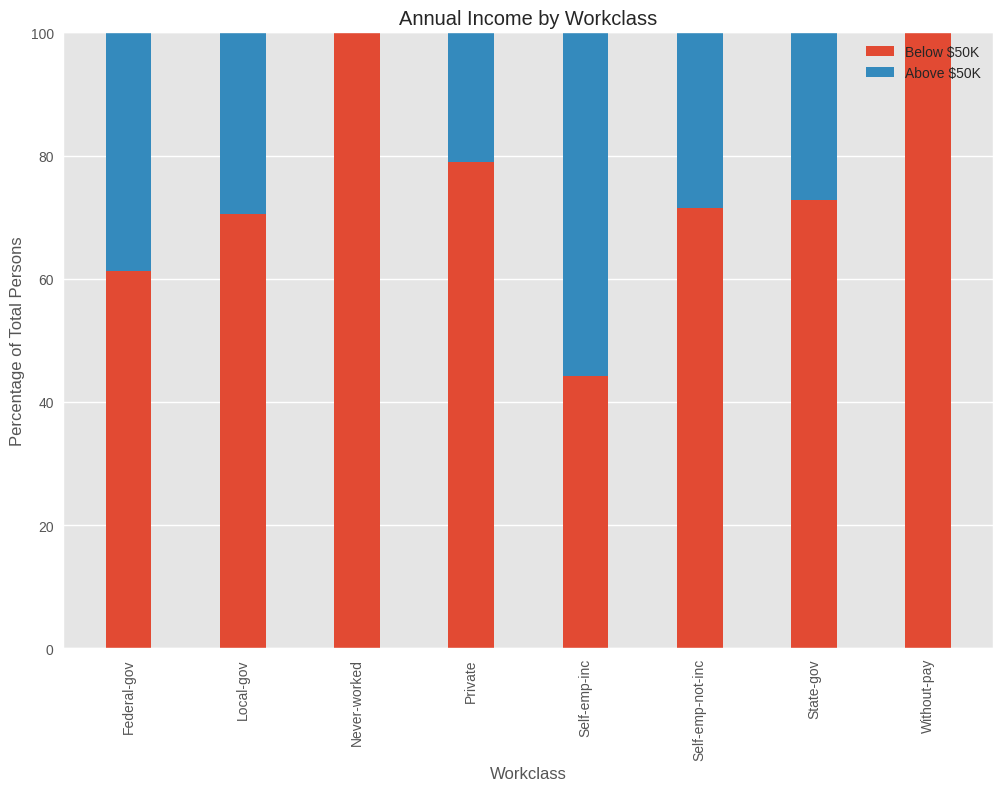

In [119]:
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(dfw['Workclass'], dfw['%ge_Below_$50K'], label='Below $50K',width=0.4)
ax.bar(dfw['Workclass'], dfw['%age_Above_$50K'], bottom=dfw['%ge_Below_$50K'], label='Above $50K',width=0.4)

# Adding labels and legend
ax.set_xlabel('Workclass')
ax.set_ylabel('Percentage of Total Persons')
ax.set_title('Annual Income by Workclass')
ax.set_xticklabels(list(dfw['Workclass']), rotation=90)
ax.set_xticks(range(len(dfw)))
ax.legend(loc='best')
plt.show()

**Observation**
```
1. Only persons in the Self-emp-inc Workclass are Above_$50K to  greater percentage as compared to those Below_$50K.

2. All other work classes have more persons with the annual salary Below_$50K more than those with the Annual salary Above_$50K.
```

In [37]:
#Relatioship of the Education level and the Annual Salary.

# Input data
dfe = df.groupby(['Education','Annual_Salary'])['Count'].count().unstack()
dfe.fillna(0, inplace=True)
dfe.reset_index(inplace=True)
dfe.columns = ['Education', 'Below_$50K', 'Above_$50K']
dfe.head(20)

,Education,Below_$50K,Above_$50K
0,10th,871.0,62.0
1,11th,1115.0,60.0
2,12th,400.0,33.0
3,1st-4th,160.0,6.0
4,5th-6th,316.0,16.0
5,7th-8th,605.0,40.0
6,9th,487.0,27.0
7,Assoc-acdm,802.0,265.0
8,Assoc-voc,1021.0,361.0
9,Bachelors,3132.0,2221.0


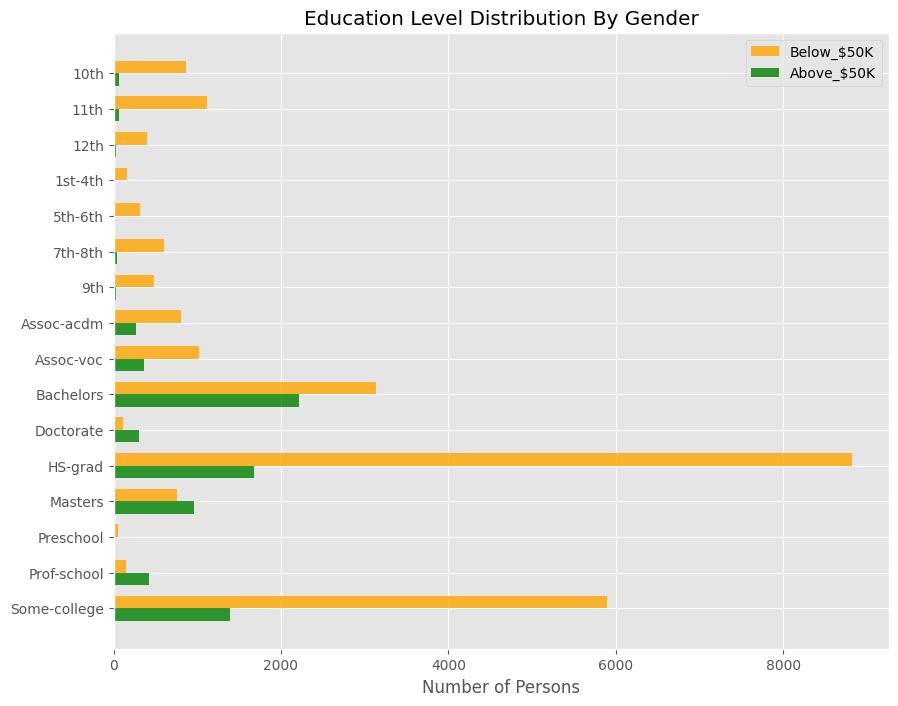

In [38]:
# Create a Horizontal bar chart
Levels = dfe['Education'].values
Below_values = dfe['Below_$50K'].values
Above_values = dfe['Above_$50K'].values

# Input data
index = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 
         'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
opacity = 0.8
y_pos = np.arange(len(index))

ax.barh(y_pos, Below_values, bar_width, alpha=opacity, color='orange', label='Below_$50K')
ax.barh(y_pos + bar_width, Above_values, bar_width, alpha=opacity, color='green', label='Above_$50K')

ax.set_yticks(y_pos + bar_width / 2)
ax.set_yticklabels(Levels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Persons')
ax.set_title('Education Level Distribution By Gender')
ax.legend()

plt.show()



**Observation**
```
1. All education levels have persons who are Below_$50K. 
However there is a greater number of persons who have their Annual Salary Above $50K in the Bachelors, HS-grad and those that have completed College.

2. The Class of Persons who have Only completed the HS-grad have the highest number of persons who earn Below_50K.
3. This is followed by those who have completed Some College
```

In [39]:
df.head(5)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary,Count
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


#Part 4: Machine Learning Data Preproocessing.
---

```
Numerical Features
```
1. Age
2. Final_Weight
3. Education_Num
4. Capital_Gain
5. Capital_Loss
6. Hours_Per_Week.
```
Ordinal Features
```
1. Education
```
Norminal Features
```
1. Workclass		
2. Marital_Status	
3. Occupation	
4. Relationship	
5. Race	
6. Sex	
7. Native_Country

In [40]:
df['Education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: Education, dtype: int64

In [41]:
#Ordinal Encode Ordinal Features
Education_dict={
'Preschool':0,
'1st-4th':1,
'5th-6th':2,
'7th-8th':3,
'9th':4,
'10th':5,
'11th':6,
'12th':7,
'HS-grad':8,
'Some-college':9,
'Assoc-acdm':10,
'Assoc-voc':11,
'Bachelors':12,
'Masters':13,
'Doctorate':14,
'Prof-school':15
}

df['Education'] = df['Education'].map(Education_dict)

In [42]:
#Arrange data into a features matrix and target vector I will drop the 'Final_Weight' column as this may not be of much importance in this analysis  
y = df['Annual_Salary']
X = df.drop(columns = ['Annual_Salary','Final_Weight'])

#Train test split (model validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
#Instantiate the Column selectors
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

#Instantiate the scaler
Scaler = StandardScaler()

#Instantiate the One HotEncoder
ohe = OneHotEncoder(handle_unknown ='ignore', sparse=False)

In [44]:
#Make Pipelines
cat_pipeline = make_pipeline(ohe)
num_pipeline = make_pipeline(Scaler)

#Instantiate a column transformer
#Tuples
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)
Column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
Column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bef4979d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bf49ca280>)])

***Applying the PCA to Transform the Features***

In [45]:
#Instantiate the standard scaler
Scaler = StandardScaler()

#Instantiate the PCA Model while retaining 95% of the variance
pca = PCA(n_components=0.95)

#Instantiate the pca_pipeline
pca_pipeline = make_pipeline(Column_transformer, pca)

***
#**Using the Decision Tree Classification Model**
---

In [46]:
#Instatiate the Decision tree Model
dec = DecisionTreeClassifier(random_state=42)
#Create the Model Pipeline
dec_pipeline = make_pipeline(pca_pipeline, dec)
#The hyperparameters
dec.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [47]:
#View the Permance of the Decision Tree Performance with default Hyperparameters
dec_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bef4979d0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bf49ca280>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [48]:
#Obtain Scores
train_score = dec_pipeline.score(X_train, y_train)
test_score = dec_pipeline.score(X_test, y_test)

print('dec_pipeline_train',train_score)
print('dec_pipeline_test', test_score)

dec_pipeline_train 0.9789771330218835
dec_pipeline_test 0.8108174554394592


**Observation**

The Accuracy score of the model on the testing dataset is 81.6% however this is slightly below the accuracy score on the train set9 (97.8%), thus the model is over fitting on the dataset.

# **Tunning the Decision Tree Model**
Hyper-parameter: *MaxDepth*

Method: *For loop*

In [49]:
#Obtain Tree Depth for the model with Default Hyperparameters
dec.get_depth()

46

In [50]:
#Loop Over the tree Depths to obtain the optimal depth

# List of values to try for max_depth:
max_depth_range = list(range(2, 46))

# List to store the score for each value of max_depth:
r2 = []

for depth in max_depth_range:
  dec = DecisionTreeClassifier(max_depth = depth, random_state = 42)
  dec_pipeline = make_pipeline(pca_pipeline, dec)
  dec_pipeline.fit(X_train, y_train)
  score = dec_pipeline.score(X_test, y_test)
  r2.append(score)

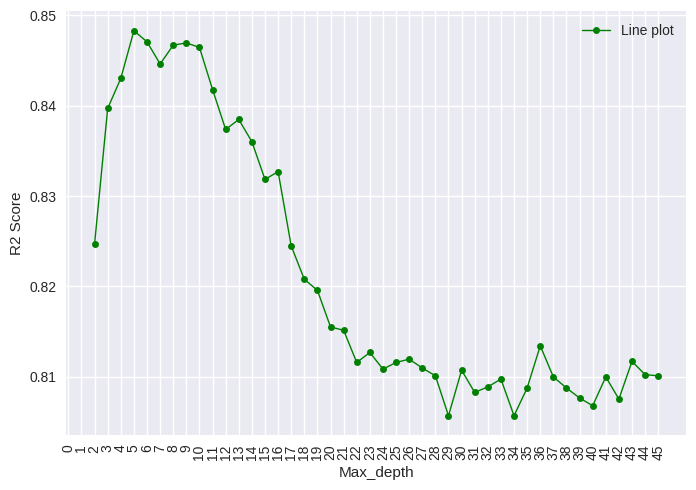

In [51]:
# Visualize which max_depth leads to the highest r2 score
plt.style.use('seaborn')

plt.plot(max_depth_range, r2, label='Line plot', linewidth=1,marker = '.', markersize=10,c='green')
#plt.scatter(max_depth_range, r2, label='Scatter plot')

plt.xlabel('Max_depth')
plt.xticks(list(range(0,46)),rotation=90)
plt.ylabel('R2 Score')

plt.legend()
plt.show()

```
Observation
```

From the image above, it looks like the best score for the model is when the parameter max_depth is 5.

In [52]:
#Running the Model with the Optimal Max Depth
dec_9 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dec_9_pipeline = make_pipeline(pca_pipeline, dec_9)
dec_9_pipeline.fit(X_train, y_train)

#Obtain predictions 
dec_preds = dec_9_pipeline.predict(X_test)

#Scores
train_9_score = dec_9_pipeline.score(X_train, y_train)
test_9_score = dec_9_pipeline.score(X_test, y_test)
print('train_9_score:',train_9_score)
print('test_9_score:',test_9_score)

train_9_score: 0.8503811163019425
test_9_score: 0.8483097725875846


**Observation**

After setting the maximum depth,

The Accuracy score of the model on the train dataset is 85.0%  and the accuracy score on the train set is 84.8%, thus the model is fitting relatively well on the dataset.

In [53]:
#Model Evaluation Using the Classification Report
report = classification_report(y_test,dec_preds, output_dict=True)
dec_rpt = pd.DataFrame(report).T
dec_rpt.reset_index(inplace=True)
dec_rpt.rename(columns={'index':'Class'}, inplace=True)
dec_rpt

,Class,precision,recall,f1-score,support
0,0,0.860700,0.954051,0.904975,6159.00000
1,1,0.783639,0.518725,0.624239,1976.00000
2,accuracy,0.848310,0.848310,0.848310,0.84831
3,macro avg,0.822170,0.736388,0.764607,8135.00000
4,weighted avg,0.841982,0.848310,0.836784,8135.00000


In [54]:
#Add Scores to The Dataframe
df = pd.DataFrame({'Class':['0','1','accuracy','macro avg','weighted avg']})
dec_rpt = dec_rpt[['Class','f1-score']]
df = pd.merge(df, dec_rpt, on ='Class', how='left')
df.rename(columns={'f1-score':'dec_f1-score'},inplace=True)
df.head()

,Class,dec_f1-score
0,0,0.904975
1,1,0.624239
2,accuracy,0.848310
3,macro avg,0.764607
4,weighted avg,0.836784


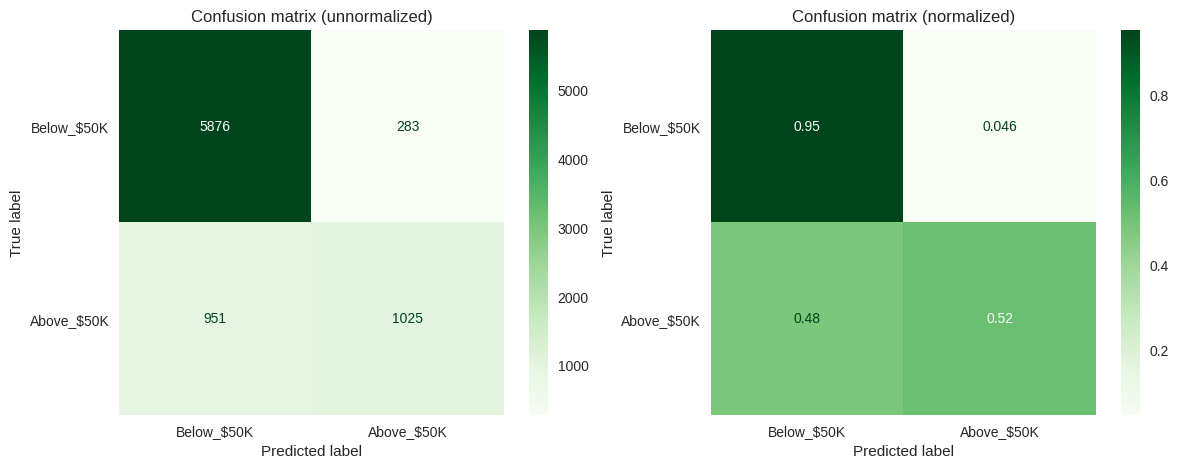

In [55]:
#Model Evaluation Using the Confusion Matrix
labels = ['Below_$50K','Above_$50K']
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plot the unnormalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,dec_preds,cmap='Greens',ax=ax[0],display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (unnormalized)')
# Plot the normalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,dec_preds,cmap='Greens',ax=ax[1], normalize='true',display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (normalized)')
for axis in ax:
    axis.grid(False)


**Observations from the Decision Tree Model**
***
```
Accuracy Scores
```
The R2 Score is the accuracy score of the model on the training data, which is the proportion of correctly classified instances out of all instances in the data set.

train_9_score: is the accuracy score which Means that the model correctly classified 85.04% of the instances in the training set.

test_9_score:  is the accuracy score of the model on the test data which means that the model correctly classified 84.83% of the instances in the test set.

The scores on the training and test sets are relatively close to each other, indicating that the model is not overfitting or underfitting on the data. 

Overall, the results suggest that the decision tree model with a maximum depth of 5 is performing reasonably well on this dataset.

```
Classification Report 
```
*Precision:*

Measures the accuracy of positive predictions.

Out of all the instances predicted as class 0, 86.07% were correctly predicted. 

Out of all the instances predicted as class 1, 51.87% were correctly predicted. 

*Recall:* 
Measures the sensitivity of the model to detect positive instances in a class.

Out of all the actual instances that belong to class 0, the model correctly identified 95.41% of them.

Out of all the actual instances that belong to class 1, the model correctly identified 62.42% of them.

*F1-score:*

Measures the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

In this Model, the F1-score for class 0 is 90.4% and only 62.4%  for Class 1

```
Confusion Matrix
```
*True Positives* : 52%

Out of all the persons Above_50K_Dollars, only 52% were truely predicted.

*False Positives* : 5%

Out of all the persons predicted as Above_50K_Dollars, 5% were wrongly predicted.

*True Negatives* : 95%

Out of all the persons Below_50K_Dollars, only 95% were truely predicted.

*False Negatives* : 5%

Out of all the persons predicted as Below_50K_Dollars, 4.8% were wrongly predicted.

```
Summary
```
The Model performed relatively well in the prediction of the Class 0 (Below_50K_Dollars) but did not perform well in identifying the class 1 (Above_50K_Dollars)


***
# **Using the Random Forest Model**
---

In [56]:
#Instantiate the Model
rf = RandomForestClassifier(random_state = 42)
#Create the Model Pipeline
rf_pipeline = make_pipeline(pca_pipeline, rf)
#The hyperparameters
rf_pipeline.get_params();

In [57]:
#View the Perfomance of the Random Forest Performance with default Hyperparameters
rf_pipeline.fit(X_train, y_train)

#Obtain Scores
train_score = rf_pipeline.score(X_train, y_train)
test_score = rf_pipeline.score(X_test, y_test)
print('rf_pipeline_train',train_score)
print('rf_pipeline_test', test_score)

rf_pipeline_train 0.9789361527743627
rf_pipeline_test 0.8454824830977259


The Accuracy score of the model on the testing dataset is 84.8% however this is slightly below the accuracy score on the train set (97.8%), thus the model is over fitting on the dataset.

# **Tunning the Random Forest Model**

Hyper-parameter: *MaxDepth*

Method: *For loop*

In [58]:
#Obtain the Estimator depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

45

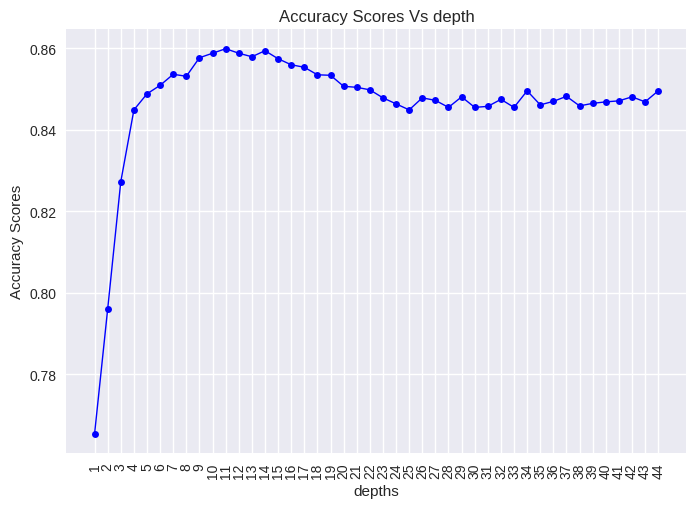

In [59]:
#Iterate through the depths to obtain the optimum depth
depths = range(1, max(est_depths))

#Create dataframe of two olumns
scores_df = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf = RandomForestClassifier(max_depth=depth)
   rf_pipeline = make_pipeline(pca_pipeline, rf)
   rf_pipeline.fit(X_train, y_train)

   #Add scores to the dataframe
   scores_df.loc[depth, 'Train Score'] = rf_pipeline.score(X_train, y_train)
   scores_df.loc[depth, 'Test Score'] = rf_pipeline.score(X_test, y_test)
   scores_df.head()

#Plot the Visualisation
plt.plot(scores_df['Test Score'], marker='.',linewidth=1, markersize=10, c='blue')
plt.xlabel('depths')
plt.xticks(range(1,45),rotation=90)
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores Vs depth')
plt.show()

In [60]:
#Arranging Scores by Descending order
sorted_scores = scores_df.sort_values(by='Test Score', ascending=False)
sorted_scores['Difference'] = sorted_scores['Train Score'] - sorted_scores['Test Score']
sorted_scores.head(7)

,Test Score,Train Score,Difference
11,0.859865,0.902836,0.042971
14,0.859373,0.937341,0.077968
10,0.858758,0.894230,0.035472
12,0.858758,0.915253,0.056494
13,0.857898,0.925211,0.067313
9,0.857652,0.881157,0.023505
15,0.857406,0.946603,0.089196


In [61]:
#Obtain the Scores basing on the optimum depth
rf = RandomForestClassifier(max_depth=13)
rf_pipeline = make_pipeline(pca_pipeline, rf)
rf_pipeline.fit(X_train, y_train)

#Predict  and view the values for y 
rf_preds = rf_pipeline.predict(X_test)

print('Train Score : ', rf_pipeline.score(X_train, y_train))
print('Test Score  : ', rf_pipeline.score(X_test, y_test))

Train Score :  0.9257847717400213
Test Score  :  0.8586355255070682


**Observation**

From the Graph, Optimal Max depth is 13 and at this the accuracy of the model is 86.0% 
on the test set and 92.6% on the train set.

However the model is slightly overfit on the data set.

**Evaluating the Random Forest Model**

In [62]:
#Model Evaluation Using the Classification Report
report = classification_report(y_test,rf_preds, output_dict=True)
rf_rpt = pd.DataFrame(report).T
rf_rpt.reset_index(inplace=True)
rf_rpt.rename(columns={'index':'Class'}, inplace=True)
rf_rpt

,Class,precision,recall,f1-score,support
0,0,0.881028,0.940250,0.909676,6159.000000
1,1,0.764405,0.604251,0.674958,1976.000000
2,accuracy,0.858636,0.858636,0.858636,0.858636
3,macro avg,0.822717,0.772251,0.792317,8135.000000
4,weighted avg,0.852700,0.858636,0.852663,8135.000000


In [63]:
#Add Scores to The Dataframe
rf_rpt = rf_rpt[['Class','f1-score']]
df = pd.merge(df, rf_rpt, on ='Class', how='left')
df.rename(columns={'f1-score':'rf_f1-score'},inplace=True)
df.head()

,Class,dec_f1-score,rf_f1-score
0,0,0.904975,0.909676
1,1,0.624239,0.674958
2,accuracy,0.848310,0.858636
3,macro avg,0.764607,0.792317
4,weighted avg,0.836784,0.852663


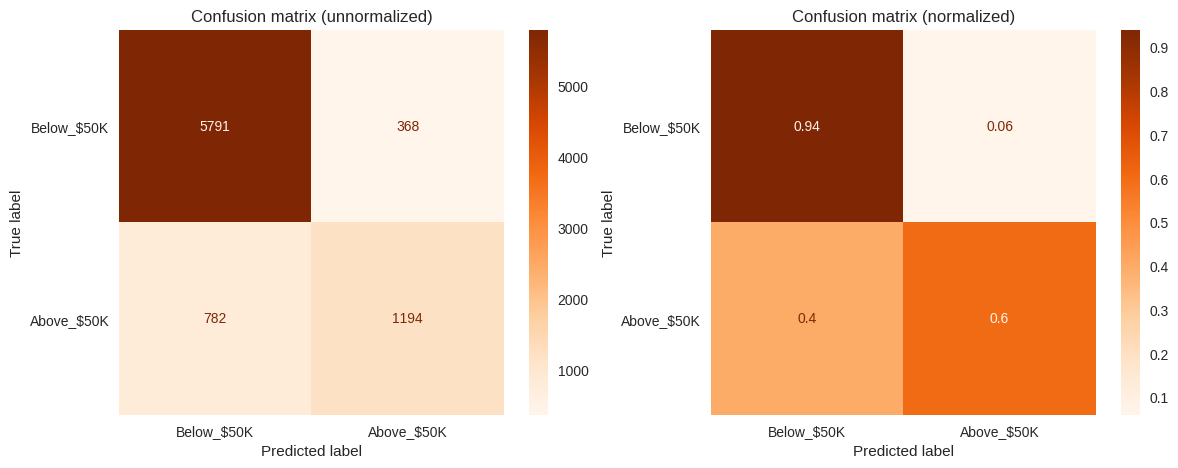

In [64]:
#Model Evaluation Using the Confusion Matrix
labels = ['Below_$50K','Above_$50K']
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plot the unnormalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,rf_preds,cmap='Oranges',ax=ax[0],display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (unnormalized)')
# Plot the normalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,rf_preds,cmap='Oranges',ax=ax[1], normalize='true',display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (normalized)')
for axis in ax:
    axis.grid(False)


**Observations from the Random Forest Model**
***
```
Accuracy Scores
```
The R2 Score is the accuracy score of the model on the training data, which is the proportion of correctly classified instances out of all instances in the data set.

Train Score: is the accuracy score which Means that the model correctly classified 92.6% of the instances in the training set.

Test Score:  is the accuracy score of the model on the test data which means that the model correctly classified 85.8% of the instances in the test set.

The scores on the training and test sets are relatively close to each other, However this indicates that the model is overfitting on the data set. **bold text**

```
Classification Report 
```
*Precision:*

Measures the accuracy of positive predictions.

Out of all the instances predicted as class 0, 88.05% were correctly predicted. 

Out of all the instances predicted as class 1, 76.4% were correctly predicted. 

*Recall:* 

Measures the sensitivity of the model to detect positive instances in a class.

Out of all the actual instances that belong to class 0, the model correctly identified 94.0% of them.

Out of all the actual instances that belong to class 1, the model correctly identified 60.2% of them.

*F1-score:*

Measures the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

In this report, the F1-score for class 0 is 91.0% and only 67.7%  for Class 1

```
Confusion Matrix
```
*True Positives* : 60%

Out of all the persons Above_50K_Dollars, only 60% were truely predicted.

*False Positives* : 6%

Out of all the persons predicted as Above_50K_Dollars, 6% were Below_50K Dollars.

*True Negatives* : 94%

Out of all the persons Below_50K_Dollars, only 94% were truely predicted.

*False Negatives* : 5%

Out of all the persons predicted as Below_50K_Dollars, 4% were Above_50K Dollars.

```
Summary
```
In terms of samples identified, the random forest model was able to correctly identify more True Positives ie, Those Above_50K Dollars(Class 1) and thus as reduced number of false Negatives ie, Those Below_50K(Class 0) than the Decision tree Model,

However the model also generated less false positives than the decision tree model.

```
Conclusion
```
Thus the Random Forest Model has performed slightly better than the Decision tree Model basing on the F1 Score.


***
#**Using the KNN Model**
***

In [65]:
#Instantiate the KNN Model Using the default Parameters 
knn = KNeighborsClassifier()
#Obtain  Tunable parameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [66]:
#Make the knn pipeline for the data processed.
knn_pipeline = make_pipeline(pca_pipeline, knn)

#Fit the Model onto the train dataset
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bef4979d0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1bf49ca280>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [67]:
#Predict the values for the test set
knn_preds = knn_pipeline.predict(X_test)

#Obtain Scores
train_score = knn_pipeline.score(X_train, y_train)
test_score = knn_pipeline.score(X_test, y_test)

print('knn_pipeline_train :',train_score)
print('knn_pipeline_test  :',test_score)

knn_pipeline_train : 0.8856241291697402
knn_pipeline_test  : 0.8329440688383528


**Observation**

The Accuracy score of the model on the testing dataset is 83.3% however this is slightly below the accuracy score on the train set (88.5%), thus the model is slightly over fitting on the dataset.

# **Tunning the KNN Model**

Hyper-parameter: *n_neighbors*

Method: *Cross Validation*

In [68]:
# Setting a range of odd integers for  values of k
ks = range(1,30, 2)
list(ks)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [69]:
# Loop through values of K
scores = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_pipeline = make_pipeline(pca_pipeline, knn)
  scores.append(cross_val_score(knn_pipeline, X_train, y_train))
  
#The different values for k perform better on different folds of the data. 
#Let's average the folds for each value of K to make them easier to compare
for index, k in enumerate(ks):
  mean_score = np.mean(scores[index])
  print(f'Score for n_neighbors = {k} is {mean_score}')

Score for n_neighbors = 1 is 0.8049751209944214
Score for n_neighbors = 3 is 0.8296860862293067
Score for n_neighbors = 5 is 0.8372264233007882
Score for n_neighbors = 7 is 0.8414882397788682
Score for n_neighbors = 9 is 0.8422671466140035
Score for n_neighbors = 11 is 0.8427997739646201
Score for n_neighbors = 13 is 0.8452176808031142
Score for n_neighbors = 15 is 0.8455865332621304
Score for n_neighbors = 17 is 0.8446029854806694
Score for n_neighbors = 19 is 0.8457914345017986
Score for n_neighbors = 21 is 0.8464880550545608
Score for n_neighbors = 23 is 0.8466929227079912
Score for n_neighbors = 25 is 0.8457913085534073
Score for n_neighbors = 27 is 0.8459962601724318
Score for n_neighbors = 29 is 0.8454225736462228


The Model with n_neighbors = 23 has athe highest accuracy score = 84.67% on the train set

In [70]:
#Evaluating the final model on the hold-out test set.

# Create a final model and final pipeline
final_model = KNeighborsClassifier(n_neighbors=23)
knn_pipeline = make_pipeline(pca_pipeline, final_model)
knn_pipeline.fit(X_train, y_train)

#Predict  and view the values for y 
knn_preds = knn_pipeline.predict(X_test)

# Evaluate the accuracy of the model on the test set.
train_score = knn_pipeline.score(X_train, y_train)
test_score = knn_pipeline.score(X_test, y_test)

print('knn_pipeline_train :',train_score)
print('knn_pipeline_test  :',test_score)

knn_pipeline_train : 0.8589459880337678
knn_pipeline_test  : 0.8437615242778119


**Observation**

After setting the number of KNeighbours,

The Accuracy score of the model on the train data is 85.9%  and the accuracy score on the test set is 84.4%, thus the model is fitting relatively well on the dataset.

**Evaluating the KNN Model**

In [71]:
#Model Evaluation Using the Classification Report
report = classification_report(y_test,knn_preds, output_dict=True)
knn_rpt = pd.DataFrame(report).T
knn_rpt.reset_index(inplace=True)
knn_rpt.rename(columns={'index':'Class'}, inplace=True)
knn_rpt

,Class,precision,recall,f1-score,support
0,0,0.875769,0.924825,0.899629,6159.000000
1,1,0.716125,0.591093,0.647630,1976.000000
2,accuracy,0.843762,0.843762,0.843762,0.843762
3,macro avg,0.795947,0.757959,0.773629,8135.000000
4,weighted avg,0.836991,0.843762,0.838418,8135.000000


In [72]:
#Add Scores to The Dataframe
knn_rpt = knn_rpt[['Class','f1-score']]
df = pd.merge(df, knn_rpt, on ='Class', how='left')
df.rename(columns={'f1-score':'knn_f1-score'},inplace=True)
df.head()

,Class,dec_f1-score,rf_f1-score,knn_f1-score
0,0,0.904975,0.909676,0.899629
1,1,0.624239,0.674958,0.647630
2,accuracy,0.848310,0.858636,0.843762
3,macro avg,0.764607,0.792317,0.773629
4,weighted avg,0.836784,0.852663,0.838418


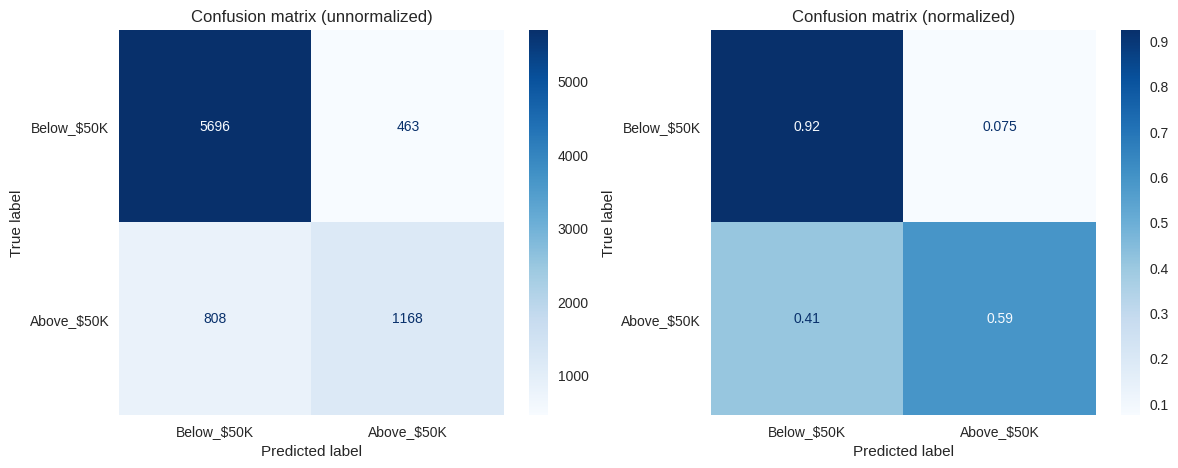

In [73]:
#Model Evaluation Using the Confusion Matrix
labels = ['Below_$50K','Above_$50K']
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plot the unnormalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,knn_preds,cmap='Blues',ax=ax[0],display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (unnormalized)')
# Plot the normalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,knn_preds,cmap='Blues',ax=ax[1], normalize='true',display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (normalized)')
for axis in ax:
    axis.grid(False)


**Observations from the KNN Model**
***
```
Accuracy Scores
```
The R2 Score is the accuracy score of the model on the training data, which is the proportion of correctly classified instances out of all instances in the data set.

Train Score: is the accuracy score which Means that the model correctly classified 85.9% of the instances in the training set.

Test Score:  is the accuracy score of the model on the test data which means that the model correctly classified 84.4% of the instances in the test set.

The scores on the training and test sets are relatively close to each other, However this indicates that the model is 

```
Classification Report 
```
*Precision:*

Measures the accuracy of positive predictions.

Out of all the instances predicted as class 0, 87.57% were correctly predicted. 

Out of all the instances predicted as class 1, 71.6% were correctly predicted. 

*Recall:* 

Measures the sensitivity of the model to detect positive instances in a class.

Out of all the actual instances that belong to class 0, the model correctly identified 92.4% of them.

Out of all the actual instances that belong to class 1, the model correctly identified 59.1% of them.

*F1-score:*

Measures the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

In this report, the F1-score for class 0 is 90.0% and only 64.8%  for Class 1

```
Confusion Matrix
```
*True Positives* : 59%

Out of all the persons Above_50K_Dollars, only 59% were truely predicted.

*False Positives* : 7.5%

Out of all the persons predicted as Above_50K_Dollars, 6% were Below_50K Dollars.

*True Negatives* : 92%

Out of all the persons Below_50K_Dollars, only 94% were truely predicted.

*False Negatives* : 4.1%

Out of all the persons predicted as Below_50K_Dollars, 4% were Above_50K Dollars.

```
Summary
```
In terms of samples identified, the Random Forest model performed better than the KNN Model. basing on the metrics used.

```
Conclusion
```
Thus the Random Forest Model has performed  better than the KNN Model basing on the F1 Score.

***
# **Logistic Regression model**
***

In [74]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()

# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(pca_pipeline, logreg)
# Training the model on the data, storing the information learned from the data 
logreg_pipe.fit(X_train, y_train)

#Make Predictions.
logreg_preds = logreg_pipe.predict_proba(X_test)

#Obtain scores on the train and test datasets
print(f'Train_score: {logreg_pipe.score(X_train, y_train)}')
print(f'Test_score : {logreg_pipe.score(X_test, y_test)}')

Train_score: 0.8480862224407836
Test_score : 0.8518746158574063


In [75]:
#Obtain parameters of the model
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##**1. Logistic Regression model with L1 Regularisation**
```
L1 regularization introduces a penalty that will push some or many weights to zero.
This is useful since the dataset has a large number of features.
```
*Changing the Solver*
```
By default: 
solver = 'lbfgs'  however this can’t do L1 regularization.

Thus i will use:
solver =  'liblinear'
```



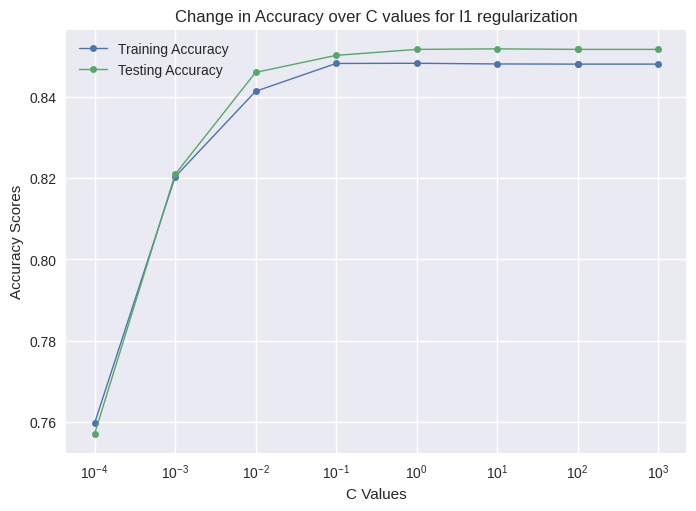

In [76]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100,1000]

#Initiate the empty Scores lists
train_scores = []
test_scores = []

#iterate over the c values
for c in c_values:
  # Instantiate a model with each value of c and fit it on the data.
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(pca_pipeline, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  Train_score = log_reg_pipe.score(X_train, y_train) 
  Test_score =  log_reg_pipe.score(X_test, y_test)
  # Add the training and testing scores to our scores lists
  train_scores.append(Train_score)
  test_scores.append(Test_score)
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, marker='.', linewidth=1, markersize=10, label='Training Accuracy')
ax.plot(c_values, test_scores, marker='.',linewidth=1, markersize=10, label='Testing Accuracy')
ax.set_title('Change in Accuracy over C values for l1 regularization',fontsize=12)
ax.set_xlabel('C Values')
ax.set_ylabel('Accuracy Scores')
ax.set_xticks(c_values)
ax.legend()
 
#Set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# Obtain a dictionary of values of C and accuracy scores
my_dict = {c:score for c, score in zip(c_values, test_scores)}

In [77]:
#Obtain a Dataframe with the testing data Scores and c_values Using the L1 Regularisation
df1 = pd.DataFrame(my_dict,index=[0])
df1

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000
0,0.757099,0.820897,0.845974,0.850154,0.851629,0.851752,0.851629,0.851629


**From the Observation: L1 Regularisation**

The best accuracy = 85.18% on the test set and is obtained when C=10  (10^1).

As we increase the value of C further than this value, the accuracy remains constant.

In [78]:
# Instantiate the model with the obtained value of c and fit it on the data.
log_reg1 = LogisticRegression(C=10, max_iter=1000, solver='liblinear', penalty='l1')
log_reg_pipe1 = make_pipeline(pca_pipeline, log_reg1)
log_reg_pipe1.fit(X_train, y_train)

#Make Predictions.
logreg_preds1 = logreg_pipe.predict(X_test)

#Obtain scores on the train and test datasets
Train_score1 = log_reg_pipe1.score(X_train, y_train) 
Test_score1 =  log_reg_pipe1.score(X_test, y_test)

print(f'Train_score: {Train_score1}')
print(f'Test_score : {Test_score1}')

Train_score: 0.8480042619457422
Test_score : 0.8517516902274124


**Evaluating the Logistic Regression model with L1 Regularisation**

In [79]:
#Model Evaluation Using the Classification Report
report = classification_report(y_test,logreg_preds1, output_dict=True)
logreg_rpt = pd.DataFrame(report).T
logreg_rpt.reset_index(inplace=True)
logreg_rpt.rename(columns={'index':'Class'}, inplace=True)
logreg_rpt

,Class,precision,recall,f1-score,support
0,0,0.878862,0.932944,0.905096,6159.000000
1,1,0.741390,0.599190,0.662748,1976.000000
2,accuracy,0.851875,0.851875,0.851875,0.851875
3,macro avg,0.810126,0.766067,0.783922,8135.000000
4,weighted avg,0.845470,0.851875,0.846229,8135.000000


In [80]:
#Add Scores to The Dataframe
logreg_rpt = logreg_rpt[['Class','f1-score']]
df = pd.merge(df, logreg_rpt, on ='Class', how='left')
df.rename(columns={'f1-score':'logreg1_f1-score'},inplace=True)
df.head()

,Class,dec_f1-score,rf_f1-score,knn_f1-score,logreg1_f1-score
0,0,0.904975,0.909676,0.899629,0.905096
1,1,0.624239,0.674958,0.647630,0.662748
2,accuracy,0.848310,0.858636,0.843762,0.851875
3,macro avg,0.764607,0.792317,0.773629,0.783922
4,weighted avg,0.836784,0.852663,0.838418,0.846229


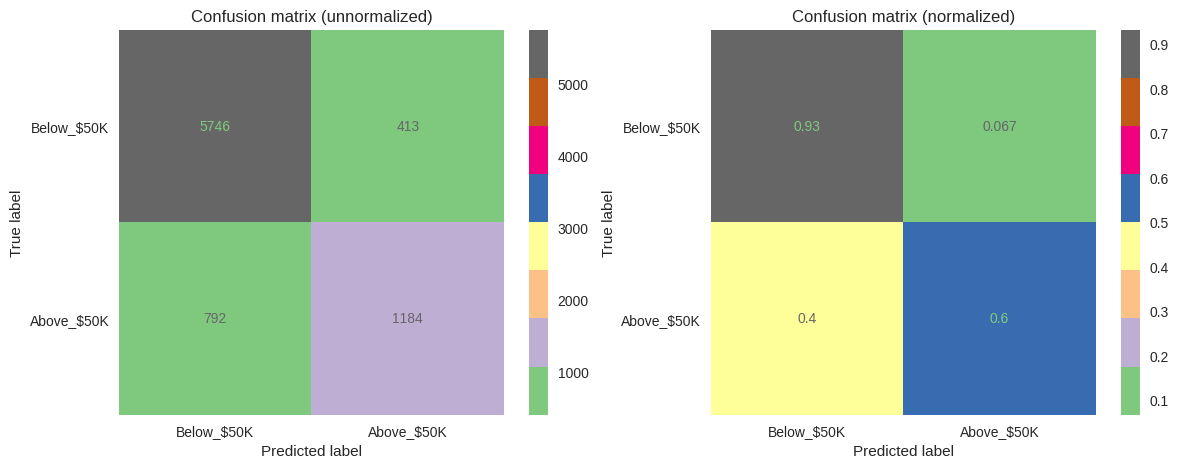

In [81]:
#Model Evaluation Using the Confusion Matrix
labels = ['Below_$50K','Above_$50K']
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plot the unnormalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,logreg_preds1,cmap='Accent',ax=ax[0],display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (unnormalized)')
# Plot the normalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,logreg_preds1,cmap='Accent',ax=ax[1], normalize='true',display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (normalized)')
for axis in ax:
    axis.grid(False)


**Observations from the Logistic Regression model with L1 Regularisation**
***
```
Accuracy Scores
```
The R2 Score is the accuracy score of the model on the training data, which is the proportion of correctly classified instances out of all instances in the data set.

Train Score: is the accuracy score which Means that the model correctly classified 84.8% of the instances in the training set.

Test Score:  is the accuracy score of the model on the test data which means that the model correctly classified 85.16% of the instances in the test set.

The scores on the training and test sets are relatively close to each other, However this indicates that the model is 

```
Classification Report 
```
*Precision:*

Measures the accuracy of positive predictions.

Out of all the instances predicted as class 0, 87.9% were correctly predicted. 

Out of all the instances predicted as class 1, 74.14% were correctly predicted. 

*Recall:* 

Measures the sensitivity of the model to detect positive instances in a class.

Out of all the actual instances that belong to class 0, the model correctly identified 93.3% of them.

Out of all the actual instances that belong to class 1, the model correctly identified 59.9% of them.

*F1-score:*

Measures the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

In this report, the F1-score for class 0 is 90.5% and only 66.3%  for Class 1

```
Confusion Matrix
```
*True Positives* : 60%

Out of all the persons Above_50K_Dollars, only 60% were truely predicted.

*False Positives* : 6.7%

Out of all the persons predicted as Above_50K_Dollars, 6.7% were Below_50K Dollars.

*True Negatives* : 93%

Out of all the persons Below_50K_Dollars, only 93% were truely predicted.

*False Negatives* : 4%

Out of all the persons predicted as Below_50K_Dollars, 4% were Above_50K Dollars.

```
Summary
```
In terms of samples identified, the Random Forest model performed better than the Logistic Regression model with L1 Regularisation. basing on the metrics used.

```
Conclusion
```
Thus the Random Forest Model has performed better than the Logistic Regression Model with L1 Regularisation basing on the F1 Score.

##**1. Logistic Regression model with L2 Regularisation**
```
L2 is applied where there is a high correlation between features, filtering out noise from data, and preventing overfitting.
```

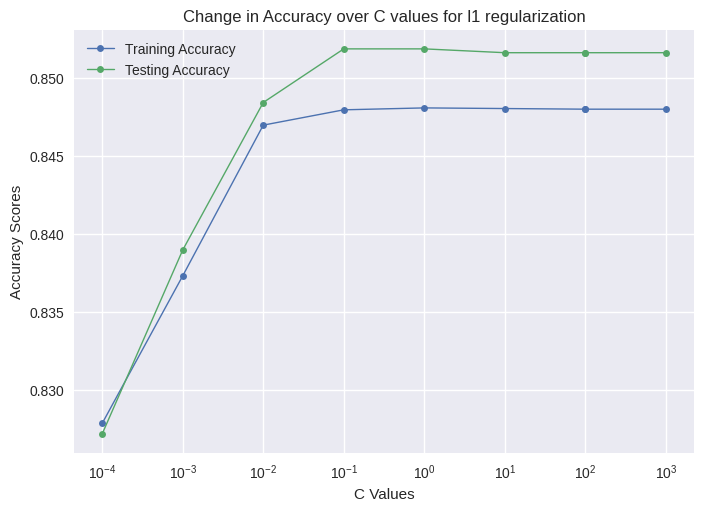

In [82]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100,1000]

#Initiate the empty Scores lists
train_scores = []
test_scores = []

#iterate over the c values
for c in c_values:
  # Instantiate a model with each value of c and fit it on the data.
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(pca_pipeline, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  Train_score = log_reg_pipe.score(X_train, y_train) 
  Test_score =  log_reg_pipe.score(X_test, y_test)
  # Add the training and testing scores to our scores lists
  train_scores.append(Train_score)
  test_scores.append(Test_score)
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, marker='.', linewidth=1, markersize=10, label='Training Accuracy')
ax.plot(c_values, test_scores, marker='.', linewidth=1, markersize=10, label='Testing Accuracy')
ax.set_title('Change in Accuracy over C values for l1 regularization',fontsize=12)
ax.set_xlabel('C Values')
ax.set_ylabel('Accuracy Scores')
ax.set_xticks(c_values)
ax.legend()
 
#Set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# Obtain a dictionary of values of C and accuracy scores
my_dict2 = {c:score for c, score in zip(c_values, test_scores)}

In [83]:
#Obtain a Dataframe with the testing data Scores and c_values Using the L1 Regularisation
df2 = pd.DataFrame(my_dict2,index=[0])
df2

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000
0,0.827167,0.838967,0.848433,0.851875,0.851875,0.851629,0.851629,0.851629


**From the Observation: L2 Regularisation**

The best accuracy = 85.19% on the test set and is obtained when C=0.1  (10^-1).

As we increase the value of C further than this value, the accuracy remains contant.

In [84]:
# Instantiate the model with the obtained value of c and fit it on the data.
log_reg2 = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2')
log_reg_pipe2 = make_pipeline(pca_pipeline, log_reg2)
log_reg_pipe2.fit(X_train, y_train)

#Make Predictions.
logreg_preds2 = logreg_pipe.predict(X_test)

#Obtain scores on the train and test datasets
Train_score2 = log_reg_pipe1.score(X_train, y_train) 
Test_score2 =  log_reg_pipe1.score(X_test, y_test)

print(f'Train_score: {Train_score2}')
print(f'Test_score : {Test_score2}')

Train_score: 0.8480042619457422
Test_score : 0.8517516902274124


**Evaluating the Logistic Regression model with L2 Regularisation**

In [85]:
#Model Evaluation Using the Classification Report
report = classification_report(y_test,logreg_preds2, output_dict=True)
logreg_rpt2 = pd.DataFrame(report).T
logreg_rpt2.reset_index(inplace=True)
logreg_rpt2.rename(columns={'index':'Class'}, inplace=True)
logreg_rpt2

,Class,precision,recall,f1-score,support
0,0,0.878862,0.932944,0.905096,6159.000000
1,1,0.741390,0.599190,0.662748,1976.000000
2,accuracy,0.851875,0.851875,0.851875,0.851875
3,macro avg,0.810126,0.766067,0.783922,8135.000000
4,weighted avg,0.845470,0.851875,0.846229,8135.000000


In [86]:
#Add Scores to The Dataframe
logreg_rpt2 = logreg_rpt2[['Class','f1-score']]
df = pd.merge(df, logreg_rpt2, on ='Class', how='left')
df.rename(columns={'f1-score':'logreg2_f1-score'},inplace=True)
df.head()

,Class,dec_f1-score,rf_f1-score,knn_f1-score,logreg1_f1-score,logreg2_f1-score
0,0,0.904975,0.909676,0.899629,0.905096,0.905096
1,1,0.624239,0.674958,0.647630,0.662748,0.662748
2,accuracy,0.848310,0.858636,0.843762,0.851875,0.851875
3,macro avg,0.764607,0.792317,0.773629,0.783922,0.783922
4,weighted avg,0.836784,0.852663,0.838418,0.846229,0.846229


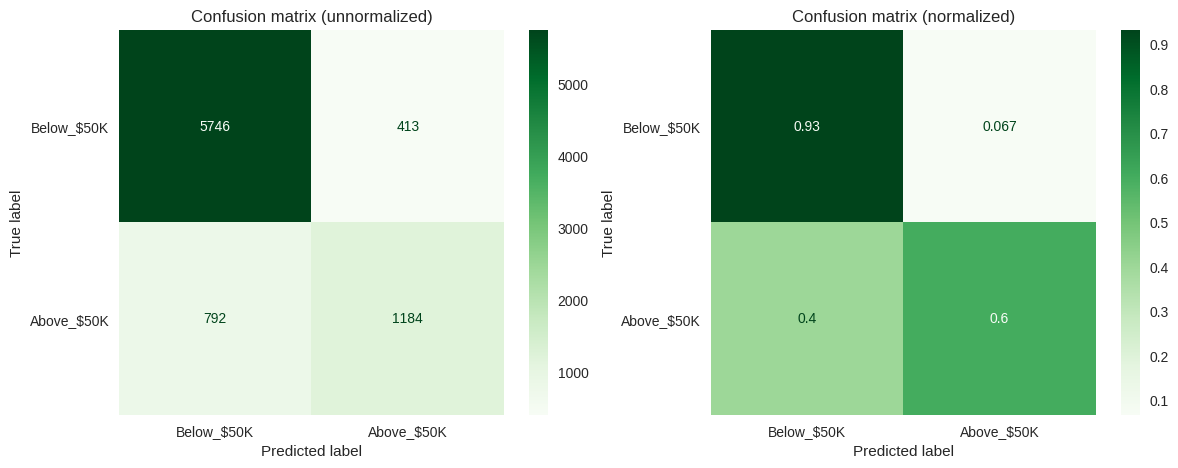

In [87]:
#Model Evaluation Using the Confusion Matrix
labels = ['Below_$50K','Above_$50K']
fig, ax = plt.subplots(1,2,figsize=(14,5))

# Plot the unnormalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,logreg_preds2, cmap='Greens',ax=ax[0],display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (unnormalized)')
# Plot the normalized confusion matrix
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test,logreg_preds2, cmap='Greens',ax=ax[1], normalize='true',display_labels=labels)
cm_disp.ax_.set_title('Confusion matrix (normalized)')
for axis in ax:
    axis.grid(False)


**Observations from the Logistic Regression model with L2 Regularisation**
***
```
Accuracy Scores
```
The R2 Score is the accuracy score of the model on the training data, which is the proportion of correctly classified instances out of all instances in the data set.

Train Score: is the accuracy score which Means that the model correctly classified 84.8% of the instances in the training set.

Test Score:  is the accuracy score of the model on the test data which means that the model correctly classified 85.18% of the instances in the test set.

The scores on the training and test sets are relatively close to each other, However this indicates that the model is 

```
Classification Report 
```
*Precision:*

Measures the accuracy of positive predictions.

Out of all the instances predicted as class 0, 87.9% were correctly predicted. 

Out of all the instances predicted as class 1, 74.14% were correctly predicted. 

*Recall:* 

Measures the sensitivity of the model to detect positive instances in a class.

Out of all the actual instances that belong to class 0, the model correctly identified 93.3% of them.

Out of all the actual instances that belong to class 1, the model correctly identified 59.9% of them.

*F1-score:*

Measures the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

In this report, the F1-score for class 0 is 90.5% and only 66.3%  for Class 1

```
Confusion Matrix
```
*True Positives* : 60%

Out of all the persons Above_50K_Dollars, only 60% were truely predicted.

*False Positives* : 6.7%

Out of all the persons predicted as Above_50K_Dollars, 6.7% were Below_50K Dollars.

*True Negatives* : 93%

Out of all the persons Below_50K_Dollars, only 93% were truely predicted.

*False Negatives* : 4%

Out of all the persons predicted as Below_50K_Dollars, 4% were Above_50K Dollars.

```
Summary
```
In terms of samples identified, the Logistic Regression model with L1 Regularisation performed similar to the Logistic Regression model with L1 Regularisation. basing on the metrics used.

```
Conclusion
```
Thus the Random Forest Model has performed better than the Logistic Regression Model with L2 Regularisation basing on the F1 Score.

**Evaluating the Performance of the Random Forest Model using the ROC Curve**

The Receiver Operating Characteristic (ROC) Curve is a way to visualize the performance of a classification model at varying thresholds.\
 
The ROC curve is a plot of the true positive rate (TPR) vs. the false positive rate (FPR). 

The TPR is the percentage of true positives out of all actual positives while the FPR is the percentage of false positives out of all actual negatives.

In [88]:
#Make predictions
rf_pipe_preds_train = rf_pipeline.predict_proba(X_train)
rf_pipe_preds_test = rf_pipeline.predict_proba(X_test)

#Calculate AUC and visualize ROC
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, rf_pipe_preds_train[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, rf_pipe_preds_test[:,1])}')

Training AUC: 0.9784719246684069
Testing AUC: 0.9088036384659426


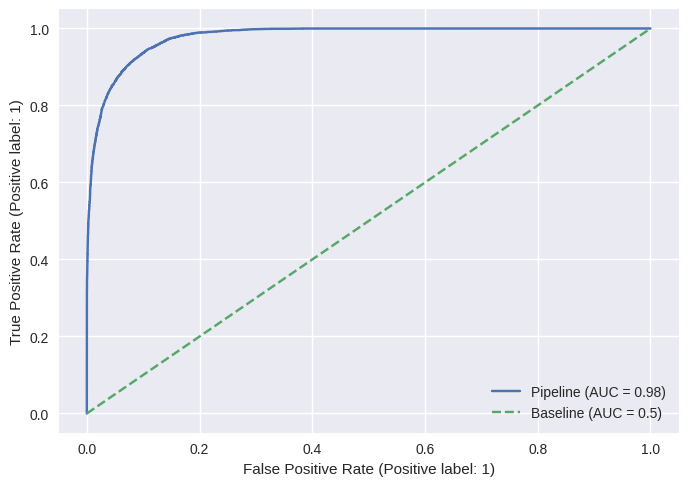

In [89]:
# Visualize the ROC curve
RocCurveDisplay.from_estimator(rf_pipeline, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

#**Recommended Model**

In [90]:
#Comparision Table with f1 Scores for the Models 
df.head()

,Class,dec_f1-score,rf_f1-score,knn_f1-score,logreg1_f1-score,logreg2_f1-score
0,0,0.904975,0.909676,0.899629,0.905096,0.905096
1,1,0.624239,0.674958,0.647630,0.662748,0.662748
2,accuracy,0.848310,0.858636,0.843762,0.851875,0.851875
3,macro avg,0.764607,0.792317,0.773629,0.783922,0.783922
4,weighted avg,0.836784,0.852663,0.838418,0.846229,0.846229


```
Recommended Production Model
```
Random Forest Model

```
Justification
```
1. The random Model has performed better on the data set compared to all the other models, evaluated using the Evaluation metrics.

2. It also has a the highest F1 score as compared to all all the other Models as indicated in the dataframe above


**Metrics used**

1. Classification Reports
2. Confusion Matrices
3. ROC Curve